# 太陽能資訊

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
!wget https://raw.githubusercontent.com/maloyang/hub202306-iot/main/02_data/plant02_day_2023-05-01.json

--2023-06-26 14:50:52--  https://raw.githubusercontent.com/maloyang/hub202306-iot/main/02_data/plant02_day_2023-05-01.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 410 [text/plain]
Saving to: ‘plant02_day_2023-05-01.json’

plant02_day_2023-05 100%[===================>]     410  --.-KB/s    in 0s      

2023-06-26 14:50:53 (10.3 MB/s) - ‘plant02_day_2023-05-01.json’ saved [410/410]



In [3]:
base_path = './'

In [4]:
import json
ffn = os.path.join(base_path, 'plant02_day_2023-05-01.json')
with open(ffn, 'r') as f:
    data = json.load(f)


In [5]:
data = data['data']

### 畫出整廠的發電

- 原來使用matplotlib

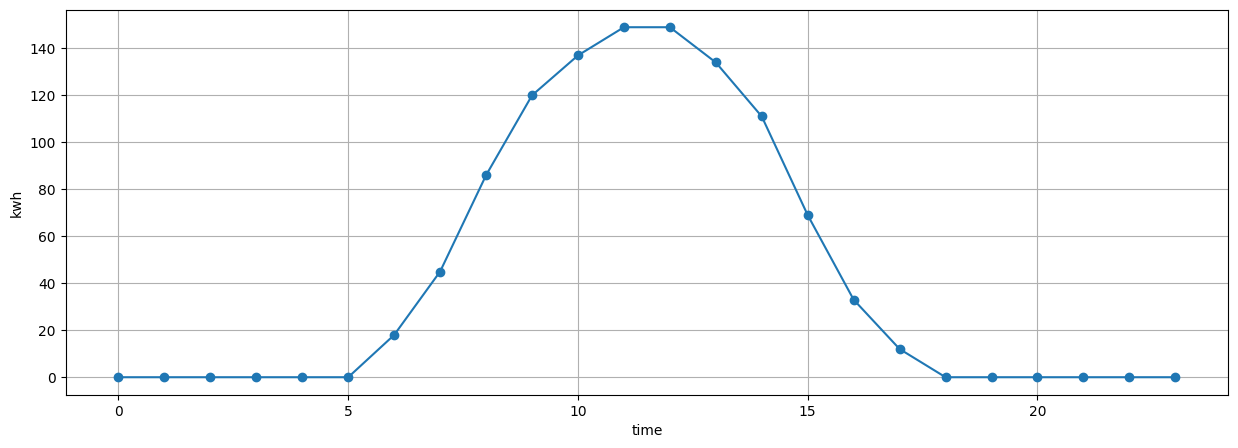

In [6]:
plt.subplots(figsize=(15,5))
plt.plot(data['hour'], data['total_e'], '-o')
plt.xlabel('time')
plt.ylabel('kwh')
#plt.xticks(data['hour'], rotation=90)
plt.grid()
plt.show()

In [7]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame(dict(
    x = data['hour'],
    y = data['total_e']
))
fig = px.line(df, x="x", y="y", title="Day Trend")
fig.show()


- X, Y軸加入好的命名方式

In [8]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame(dict(
    time = data['hour'],
    kWh = data['total_e']
))
fig = px.line(df, x="time", y="kWh", title="Day Trend")
fig.show()


- 加入 Marker

In [9]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame(dict(
    time = data['hour'],
    kWh = data['total_e']
))
fig = px.line(df, x="time", y="kWh", title="Day Trend", markers=True)
fig.show()


### 這樣並不容易評估發電是否夠好
- 我們一般會把數據uni-form
- 除以整個設置容量: kWh/capacity=kWh/kWp = deg4kw

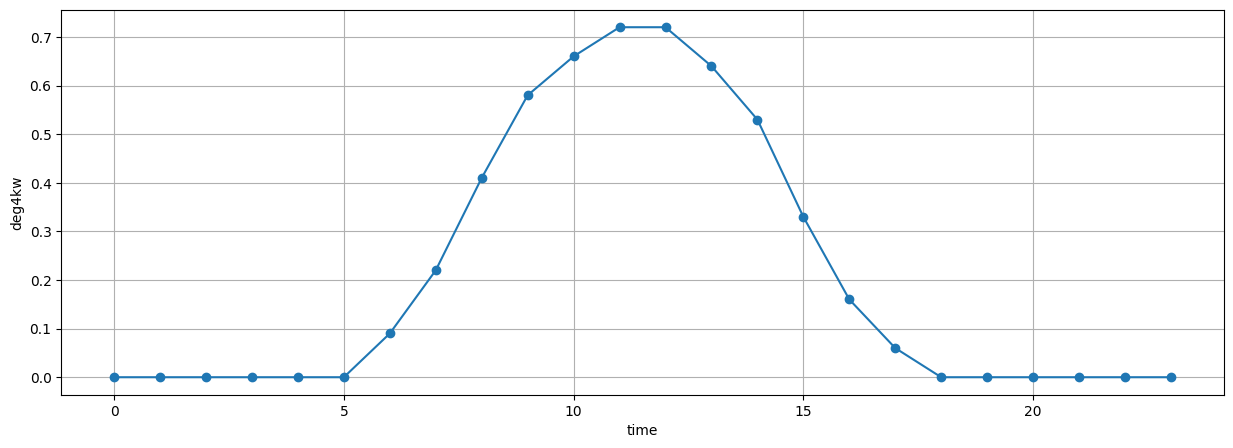

In [10]:
plt.subplots(figsize=(15,5))
plt.plot(data['hour'], data['deg4kw'], '-o')
plt.xlabel('time')
plt.ylabel('deg4kw')
plt.grid()
plt.show()

- 用plotly

In [11]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame(dict(
    time = data['hour'],
    deg4kw = data['deg4kw']
))
fig = px.line(df, x="time", y="deg4kw", title="Day Trend", markers=True)
fig.show()


### 把日照的資訊加進來

In [12]:
for i in range(len(data['sun'])):
    data['sun'][i]/=1000

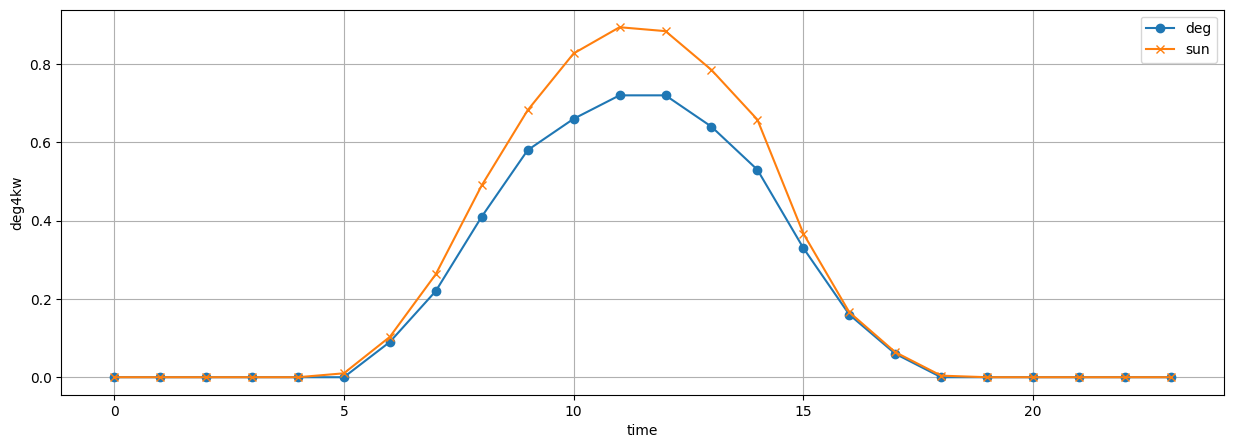

In [13]:
plt.subplots(figsize=(15,5))
plt.plot(data['hour'], data['deg4kw'], '-o', label='deg')
plt.plot(data['hour'], data['sun'], '-x', label='sun')
plt.xlabel('time')
plt.ylabel('deg4kw')
plt.grid()
plt.legend()
plt.show()

- 使用plotly

In [14]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame(dict(
    time = data['hour'],
    deg4kw = data['deg4kw'],
    sun = data['sun']
))
fig = px.line(df, x="time", y=["deg4kw", 'sun'], title="Day Trend", markers=True)
fig.show()


- 一次畫二張圖，Y轉的Title就跑掉了，我們可以修改程式如下處理

In [16]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame(dict(
    time = data['hour'],
    deg4kw = data['deg4kw'],
    sun = data['sun']
))
fig = px.line(df, x="time", y=["deg4kw", 'sun'], title="Day Trend", markers=True)
fig.update_layout(
    xaxis_title="hour", yaxis_title="Degree/kW"
)

fig.show()

